In [1]:
import os
import pandas as pd

In [2]:
# collect gene id
# build dict
gene_dict = {}
wrong_list = []
dict_path = r"F:\S3\research\temoseq" # change tomo-seq floder path
files_dict = os.listdir(dict_path)
count = 0
for txt in files_dict:
    temp = pd.read_table(dict_path+"/"+ txt,header = None)
    count +=1
    gene_id = list(temp[0])
    gene_name = list(temp[1])
    for i in range(len(gene_id)):
        if gene_id[i] not in gene_dict:
            gene_dict[gene_id[i]] = gene_name[i]
        else:
            if str(gene_name[i]) != str(gene_dict[gene_id[i]]):
                print(gene_name[i])
                print('----------')
                print(gene_dict[gene_id[i]])
                wrong_list.append(gene_name[i]) 
    print(count)  
print('Number of genes: '+str(len(gene_dict)))
print('Number of inconsistency: '+str(len(wrong_list)))

1
2
3
4
5
6
7
8
9
Number of genes: 13368
Number of inconsistency: 0


In [14]:
gene_dict

{'ENSDARG00000010658': 'insig1',
 'ENSDARG00000019335': 'hes6',
 'ENSDARG00000053716': 'NAIF1 (2 of 3)',
 'ENSDARG00000062382': 'snapin',
 'ENSDARG00000061411': 'nelfa',
 'ENSDARG00000039390': 'C13H6orf57',
 'ENSDARG00000015059': 'daam1a',
 'ENSDARG00000016016': 'dbnlb',
 'ENSDARG00000005049': 'rab20',
 'ENSDARG00000055737': 'ube3a',
 'ENSDARG00000062627': 'sacs',
 'ENSDARG00000054842': 'hsd17b14',
 'ENSDARG00000035984': 'mnx1',
 'ENSDARG00000094384': 'si:dkey-15h8.12',
 'ENSDARG00000013582': 'ck2a2b',
 'ENSDARG00000093204': 'si:dkeyp-53d3.5',
 'ENSDARG00000032430': 'ppp2r1b',
 'ENSDARG00000086346': 'si:dkey-82i20.5',
 'ENSDARG00000030289': 'jag1a',
 'ENSDARG00000011493': 'DCUN1D3',
 'ENSDARG00000095351': 'si:ch73-308b14.1',
 'ENSDARG00000019950': 'carf',
 'ENSDARG00000089511': 'si:ch73-78o10.1',
 'ENSDARG00000009881': 'ier5',
 'ENSDARG00000077775': 'zgc:193681',
 'ENSDARG00000014594': 'anxa1b',
 'ENSDARG00000020623': 'baxa',
 'ENSDARG00000010941': 'pomgnt2',
 'ENSDARG00000060534': 'sg

In [3]:
# search gene id for given gene name(s)
def search_gene(gene_name_list): 
    # input: gene name
    # output: gene_id
    gene_id_list = []
    for i in gene_name_list:
        if i in gene_dict.values():
            gene_id_list.append(list (gene_dict.keys()) [list (gene_dict.values()).index (i)])
    return gene_id_list

In [4]:
# change the gene names
# hint: make sure the gene name is string type and save it as a list
gene_name_list = ['han2',
'six4b',
'fli1a',
'hand2',
'gfi1aa',
'gata1a',
'nkx2.7',
'etv2',
'nkx2.5',
'spi1b',
'hbbe3',
'wnt2bb',
'lmo2',
'tmem88a',
'hbae1',
'zfpm1',
'cpox',
'drl',
'tbx1',
'six1a',
'prrx1a',
'sox7',
'gata5',
'tbx20']

In [15]:
# get gene id 
gene_id_list =search_gene(gene_name_list)
gene_id_list

['ENSDARG00000019930',
 'ENSDARG00000031983',
 'ENSDARG00000054632',
 'ENSDARG00000008305',
 'ENSDARG00000020746',
 'ENSDARG00000013477',
 'ENSDARG00000021232',
 'ENSDARG00000053868',
 'ENSDARG00000018004',
 'ENSDARG00000000767',
 'ENSDARG00000038147',
 'ENSDARG00000032234',
 'ENSDARG00000095019',
 'ENSDARG00000056920',
 'ENSDARG00000089475',
 'ENSDARG00000041572',
 'ENSDARG00000062025',
 'ENSDARG00000078004',
 'ENSDARG00000031891',
 'ENSDARG00000039304',
 'ENSDARG00000033971',
 'ENSDARG00000030125',
 'ENSDARG00000017821',
 'ENSDARG00000005150']

In [16]:
# get particulat genes dataframe
def gene_dataframe(dataset,gene_id_list):
    dataset.set_index(['GENEID'],inplace=True)
    trans_dataset = dataset.T
    target_list = []
    for i in gene_id_list:
        if i in list(dataset.index):
            target_list.append(i)
    final_result = trans_dataset[target_list].T
    return final_result

In [9]:
# gene dataset
gene_dataset = pd.read_table(r"F:\S3\research\data\normalization\whole_lpm_TMM_nor_10ss_lr.csv",delimiter = ',') # change file path
# get sub-dataset
sub_dataset = gene_dataframe(gene_dataset,gene_id_list)
sub_dataset.head(10)

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
GENEID,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000019930,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.00000,...,18.156069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000031983,0.000000,0.0,0.0,0.0,0.0,0.0,32.191485,0.00000,0.000000,0.00000,...,9.078035,0.000000,9.936166,0.000000,11.447568,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000054632,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000008305,0.000000,0.0,0.0,0.0,0.0,0.0,64.382971,27.17816,32.527772,0.00000,...,108.936414,106.436365,139.106330,142.909611,68.685409,61.640449,17.938055,0.0,0.0,0.000000
ENSDARG00000020746,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,9.936166,28.581922,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000013477,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.00000,...,45.390172,0.000000,9.936166,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000021232,0.000000,0.0,0.0,0.0,0.0,0.0,32.191485,27.17816,16.263886,0.00000,...,163.404621,141.915153,99.361664,28.581922,34.342705,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000053868,220.247345,0.0,0.0,0.0,0.0,0.0,64.382971,0.00000,81.319430,63.86594,...,54.468207,0.000000,49.680832,0.000000,22.895136,41.093633,17.938055,0.0,0.0,82.550255
ENSDARG00000018004,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [ ]:
# option, save the sub-dataset
sub_dataset.to_csv(r"F:\S3\research\final_lpm\24lpm_10ss_lr_TMM.csv") # change the path!

AxesSubplot(0.125,0.125;0.775x0.755)


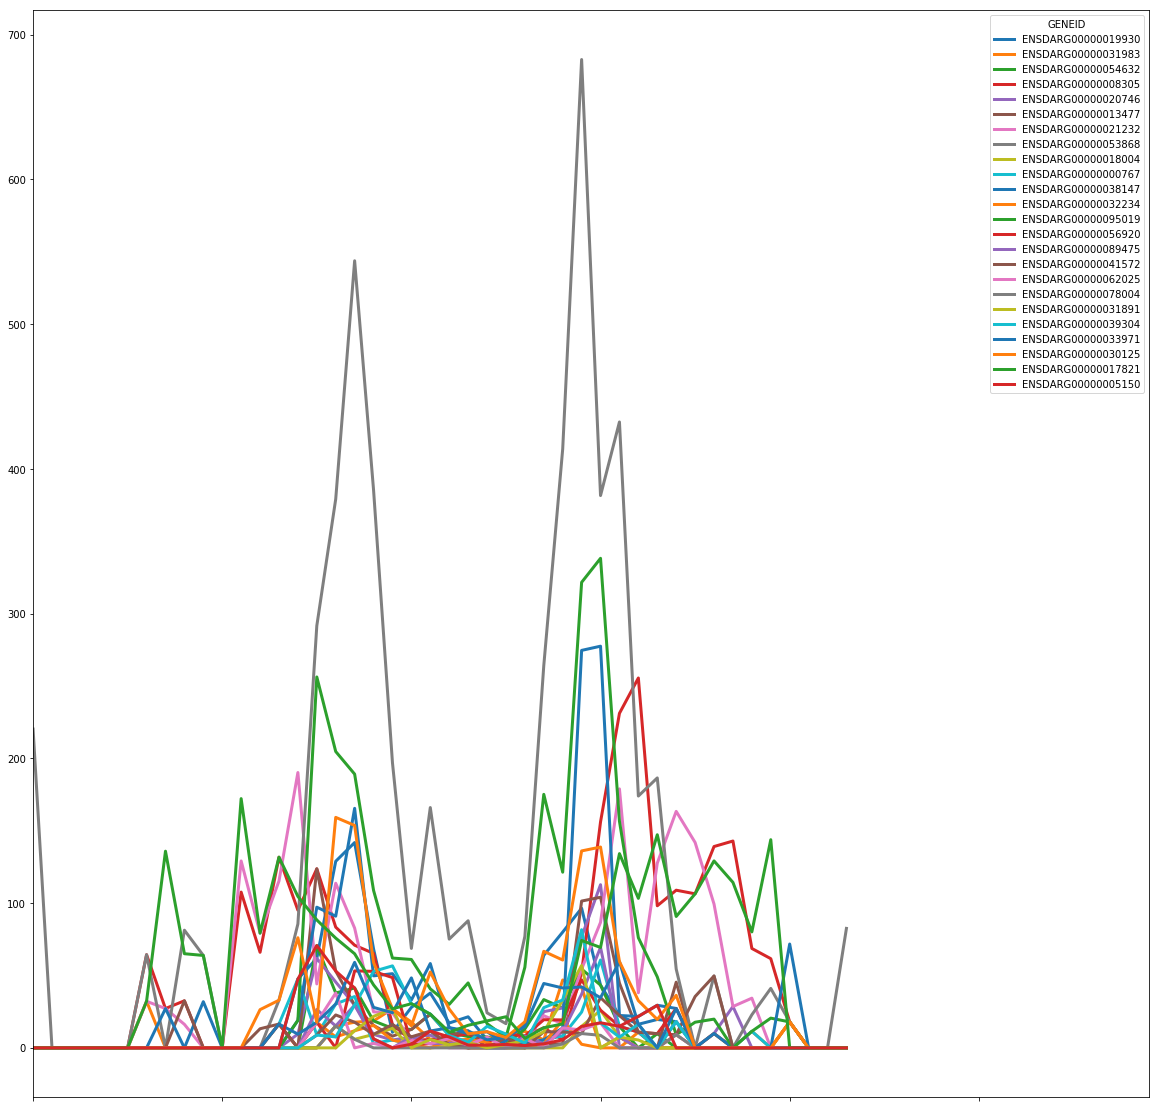

In [18]:
# visulization
plot = sub_dataset.T.plot(figsize=(20,20),xlim=(0,59),linewidth=3)
print(plot)